# Matplotlib - 3D

In [1]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword p`rojection='3d'` to any of the normal axes creation routines:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

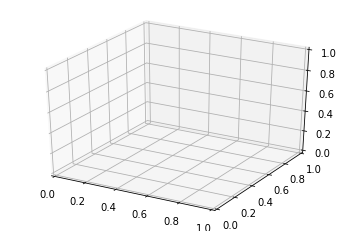

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### Three-dimensional Points and Lines

In analogy with the more common two-dimensional plots discussed earlier, these can be created using the `ax.plot3D` and `ax.scatter3D` functions

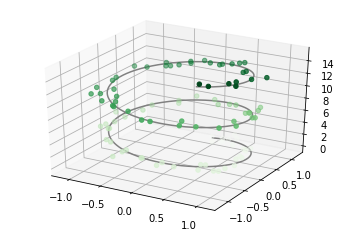

In [6]:
ax = plt.axes(projection='3d')

# data for the three-dimentional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline, 'gray')

# data for the three-dimentional scatter points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 *np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')



Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

### Three-dimensional Countour Plots

 Like two-dimensional ax.contour plots,` ax.contour3D` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point

In [44]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)


Text(0.5, 0, 'x')

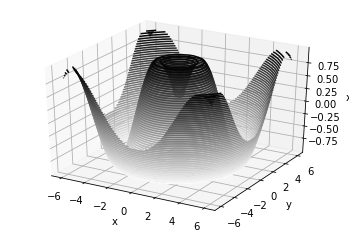

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('x')

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles.\
In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

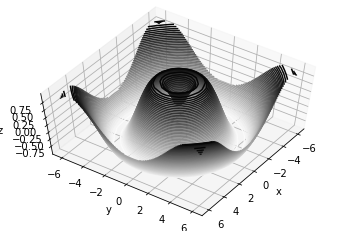

In [12]:
ax.view_init(60,35)
fig

### Wireframes and Surface Plots

 These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize. Here's an example of using a wireframe:

Text(0.5, 0.92, 'wireframe')

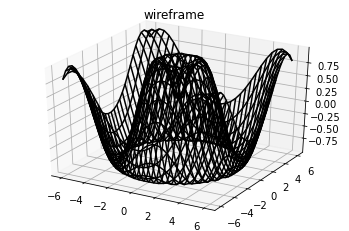

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(x,y,z, color='black')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

Text(0.5, 0.92, 'surface')

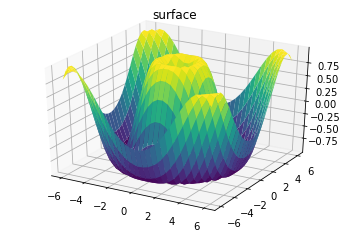

In [15]:
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none')
ax.set_title('surface')

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear. Here is an example of creating a partial polar grid, which when used with the `surface3D `plot can give us a slice into the function we're visualizing

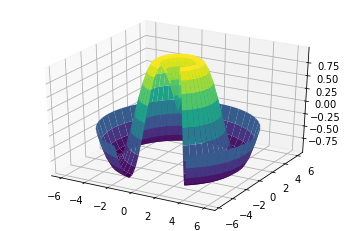

In [18]:
r = np.linspace(0,6,20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r,theta)

x = r * np.sin(theta)
y = r * np.cos(theta)
z = f(x, y)

ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none')

### Surface Triangulations

For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient. In these situations, the triangulation-based plots can be very useful. What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [19]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

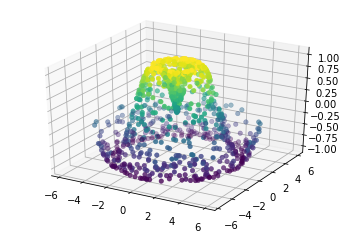

In [20]:
ax = plt.axes(projection='3d')
ax.scatter(x,y,z,c=z, cmap='viridis', linewidth=0.5)

This leaves a lot to be desired. The function that will help us in this case is `ax.plot_trisurf`, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

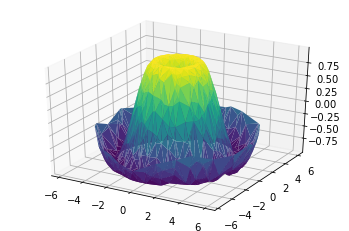

In [21]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

____
___

### Class Tutorial

In [22]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

To begin with, let’s create 3D axes. We pass projection='3d' to `plt.exes()`, which returns an `Axes3DSubplot` object here. This is the empty canvas that we'll be painting on.

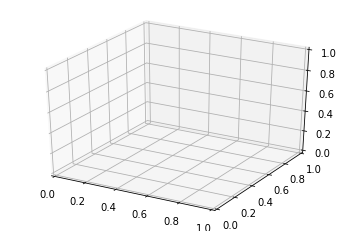

In [23]:
# create an empty canvas
ax = plt.axes(projection='3d')

We will demonstrate 3D plots on a multivariate normal distribution. The first step is to generate a domain for the distribution:

In [25]:
# divide the inetrval <-10,10> into 500 parts
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)

# a Cartesian product
X,Y = np.meshgrid(x,y)

The Cartesian product generates each combination of values from given arrays. For example, if we have an array x with values [0,1] and an array y with values [0,1] the Cartesian product od these two arrays will be four points. To be more specific, the points will be [0,0], [0,1], [1,0], [1,1].



In [27]:
# the paramenters of the distributions
# x
mu_x = 0
variance_x = 10

# y
mu_y = 0
variance_y = 10

# a means list
means = [mu_x, mu_y]

# a covariance
cov = [[variance_x, 0], [0, variance_y]]

# a multivariate normal distribution
mn = multivariate_normal(means, cov)




The first parameter of the function **multivariate_normal** is the list with means. The second parameter is the covariance matrix. The last thing we need to do before plotting our distribution is to compute the z-coordinates of our plot.

In [36]:
# position matrix
position = np.array([X,Y]).T

# z-coordinates from a probability-density function
Z = mn.pdf(position)

### Wireframe



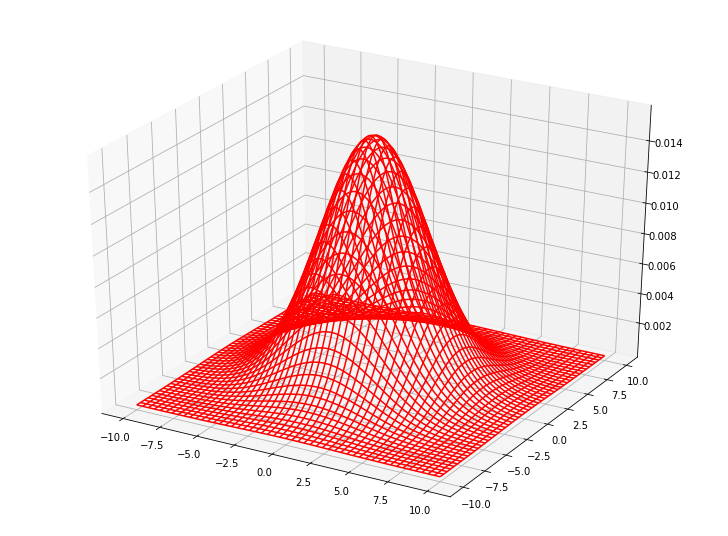

In [31]:
# create the figure and axes
fig, ax = plt.subplots(figsize = (12.8, 9.6))

# set a 3D projection
ax = plt.axes(projection='3d')

# a wireframe
ax.plot_wireframe(X,Y, Z, color='r')
plt.show()

### Surface


This below is a surface plot, which is also very straightforward:

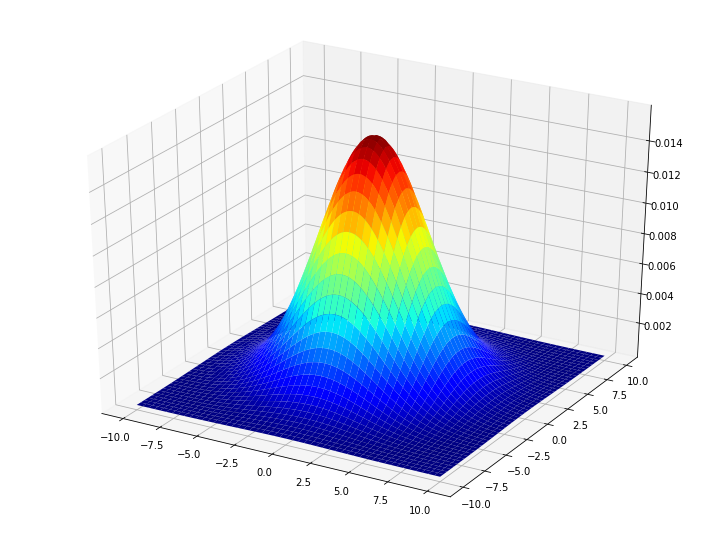

In [33]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(12.8, 9.6))

# set a 3D projections
ax= plt.axes(projection='3d')

# the surface
ax.plot_surface(X,Y,Z, cmap='jet')
plt.show()

Parameter `cmap` is a color-color map parameter. You can try various colormaps from [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

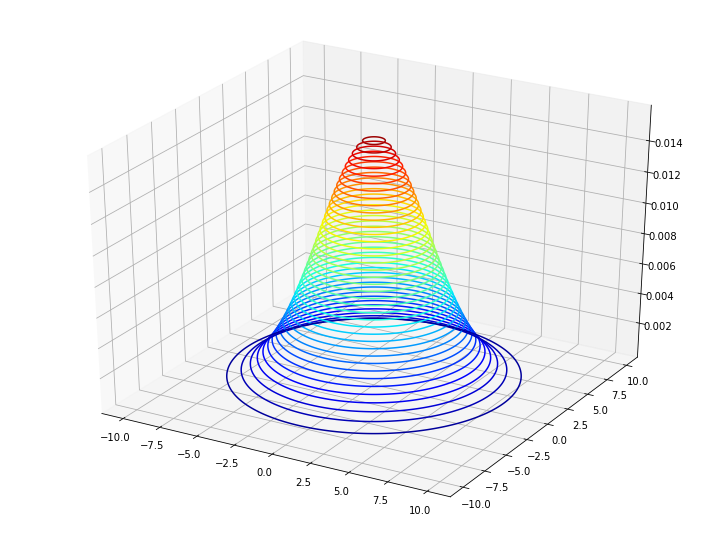

In [34]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(12.8, 9.6))

# set a 3D projection
ax = plt.axes(projection = '3d')

# the surface
ax.contour(X,Y,Z, 40, cmap='jet')
plt.show()